# UTA result analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, MaxNLocator

In [2]:
def float2str(time, *args):
    """Converts a time in seconds to a hh:mm:ss string."""
    time = np.round(time)
    hours = int(time // 3600)
    minutes = int((time % 3600) // 60)
    seconds = int(time % 60)
    return '{:02d}:{:02d}:{:02d}'.format(hours, minutes, seconds)

float2str_formatter = FuncFormatter(float2str)
float2str_min_formatter = FuncFormatter(lambda x, *args: float2str(x)[:-3])

In [3]:
def choose_tick_interval(values, allowed_intervals, n_ticks=4):
    """Chooses a suitable tick interval for plot axes."""
    interval = 3*np.std(values)/n_ticks
    i_min = np.argmin(np.abs(np.array(allowed_intervals) - interval))
    return allowed_intervals[i_min]

In [4]:
def plot_distribution(fig, df, name, seconds=True, n_bins=40, n_ticks=4):
    """Makes a boxplot and histogram to show a split time distribution."""
    ax1, ax2 = fig.subplots(
        2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 4]})
    fig.suptitle(
        name.replace(' split time', '')
        + ' ({:.1f} km)'.format(distance(name.replace(' split time', '')))
        + ' (n = {:d})'.format(np.sum(~np.isnan(df[name])))
    )
    
    data = df[name].astype('timedelta64[s]')
    data = data[np.abs(data - np.mean(data))/np.std(data) <= 5]
    
    ax1.boxplot(data, vert=False, widths=0.9)
    ax1.set_yticklabels([])
    ax1.axis('off')
    
    ax2.hist(data, bins=n_bins, edgecolor='0.25')
    ax2.grid()
    ax2.set_axisbelow(True)
    # ax2.set_ylabel('Number of runners')

    x_interval = choose_tick_interval(
        data, [60, 5*60, 10*60, 30*30, 60*60, 2*60*60], n_ticks=n_ticks)
    ax2.xaxis.set_major_locator(MultipleLocator(base=x_interval))
    ax2.xaxis.set_major_formatter(
        float2str_formatter if seconds else float2str_min_formatter)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(30)
        tick.set_ha('right')

## UTA50

In [8]:
timing_point_df = pd.read_csv('../data/UTA50_2021_timing_points.csv')
def distance(name):
    idx = timing_point_df['Name'] == name
    return timing_point_df['Distance (km)'][idx].item()

In [9]:
df = pd.read_csv('../data/UTA50_2021_split_times.csv')
for col in df.columns:
    if 'split time' in col:
        df[col] = df[col].apply(pd.Timedelta)

df.head()

,Surname,First Name,Category,Gender,Age,Club,Australia,Start Group,KCC OVAL split time,KCC OVAL place,...,Sewage Treatment Works arrival time,Sewage Treatment Works departure time,Base of Furber Steps split time,Base of Furber Steps place,Base of Furber Steps arrival time,Base of Furber Steps departure time,Scenic World split time,Scenic World place,Scenic World arrival time,Scenic World departure time
0,Brimelow,Tom,MasterM,Male,40-49,Northern Gold Coast Running Club,Australia,Start Group 1,0 days,-,...,10:22:55,NaN,NaT,NaN,NaN,NaN,0 days 04:35:44,1,11:07:44,NaN
1,Taylor,Luke,Vet M,Male,30-39,NaN,Australia,Start Group 1,0 days,-,...,10:26:23,NaN,0 days 04:24:47,2.0,10:56:47,NaN,0 days 04:37:36,2,11:09:36,NaN
2,Macpherson,Gerald,OpenM,Male,18-29,Run Crew,Australia,Start Group 1,0 days,-,...,10:16:45,NaN,0 days 04:22:10,1.0,10:54:10,NaN,0 days 04:38:06,3,11:10:06,NaN
3,Green,Mark,MasterM,Male,40-49,The Body Mechanic,New Zealand,Start Group 1,0 days,-,...,10:32:59,NaN,0 days 04:32:55,3.0,11:04:55,NaN,0 days 04:45:33,4,11:17:33,NaN
4,Driscoll,Tom,OpenM,Male,18-29,JT Multisport,Australia,Start Group 1,0 days,-,...,10:34:36,NaN,0 days 04:35:08,4.0,11:07:08,NaN,0 days 04:48:53,5,11:20:53,NaN


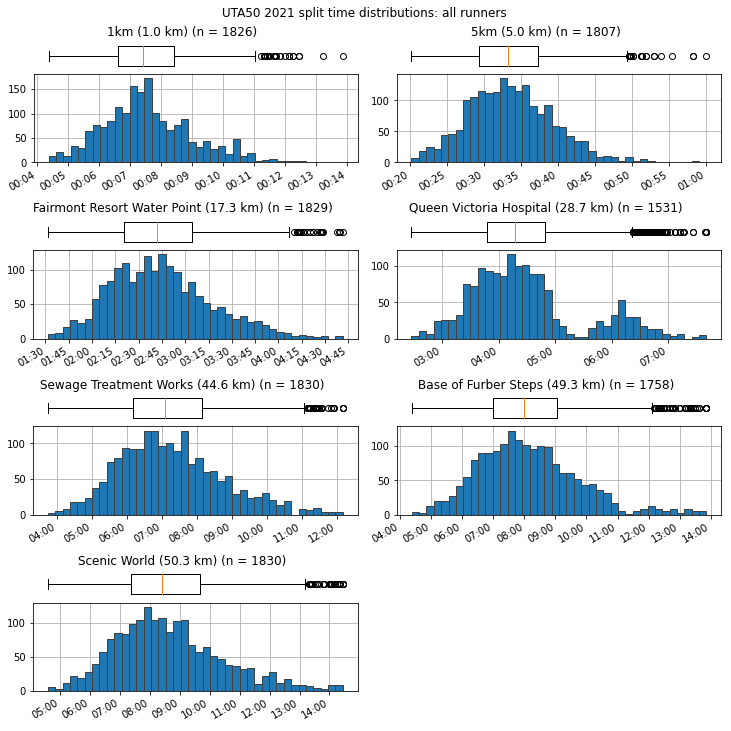

In [14]:
timing_points = df.columns[df.columns.str.contains('split time')][1:]

fig = plt.figure(figsize=(10,10), constrained_layout=True)
subfigs = fig.subfigures(4, 2)
for i in range(timing_points.size):
    plot_distribution(subfigs.flat[i], df, timing_points[i], seconds=False)

fig.suptitle('UTA50 2021 split time distributions: all runners')
fig.savefig(
    '../figures/UTA50_2021/UTA50_2021_overall.png',
    facecolor='w', bbox_inches='tight')

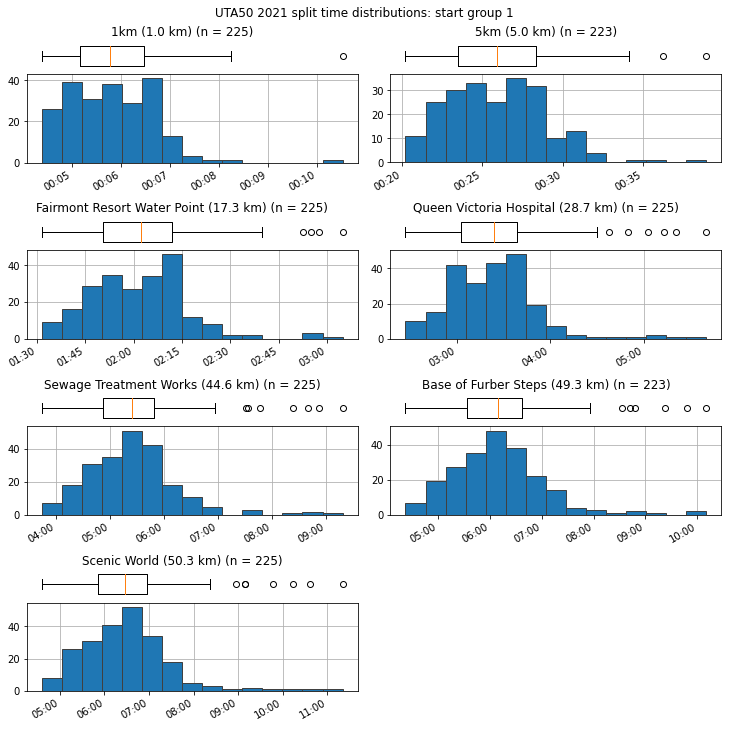

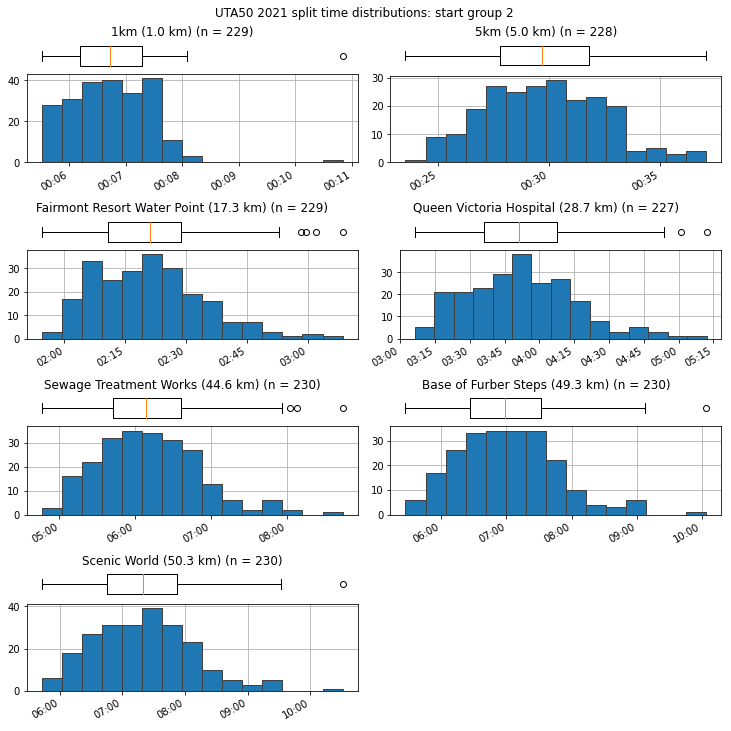

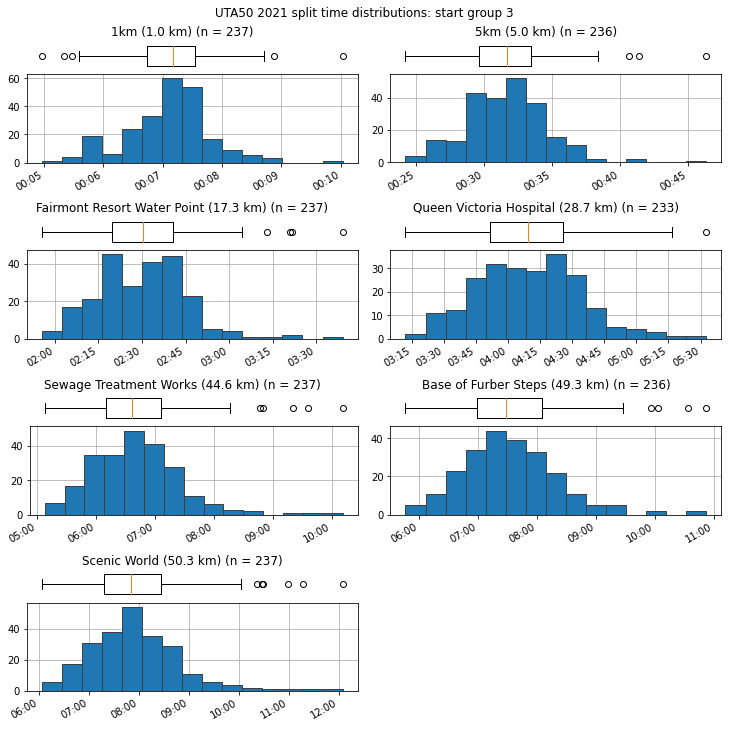

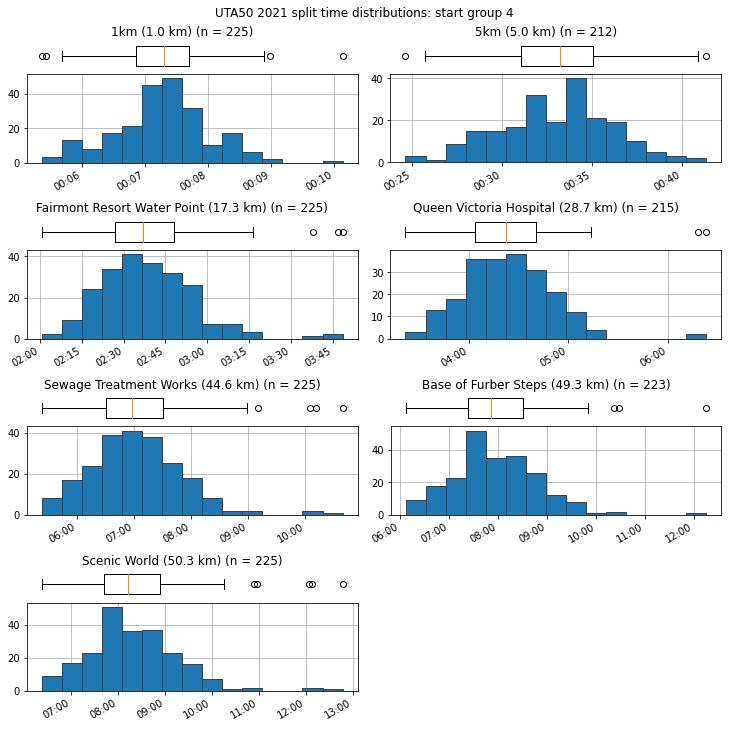

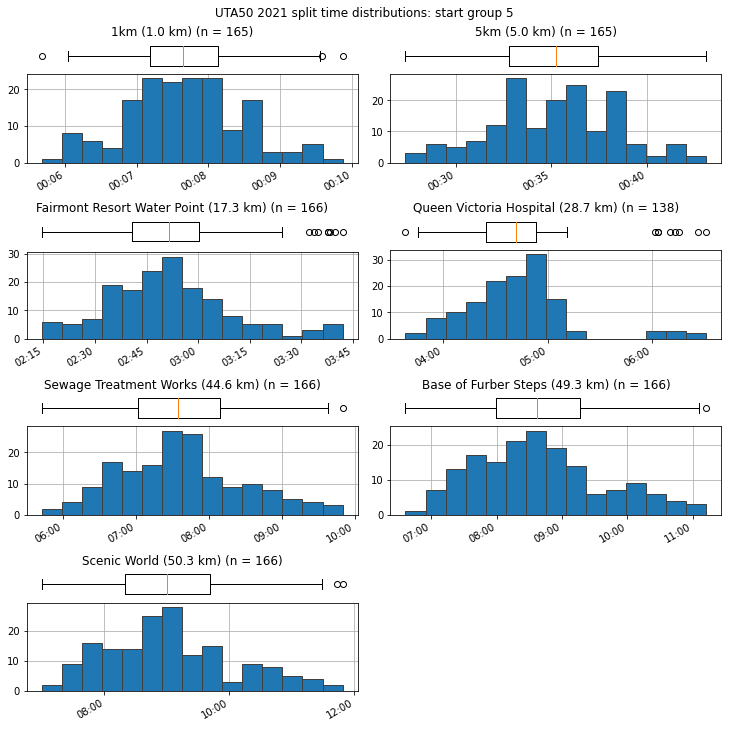

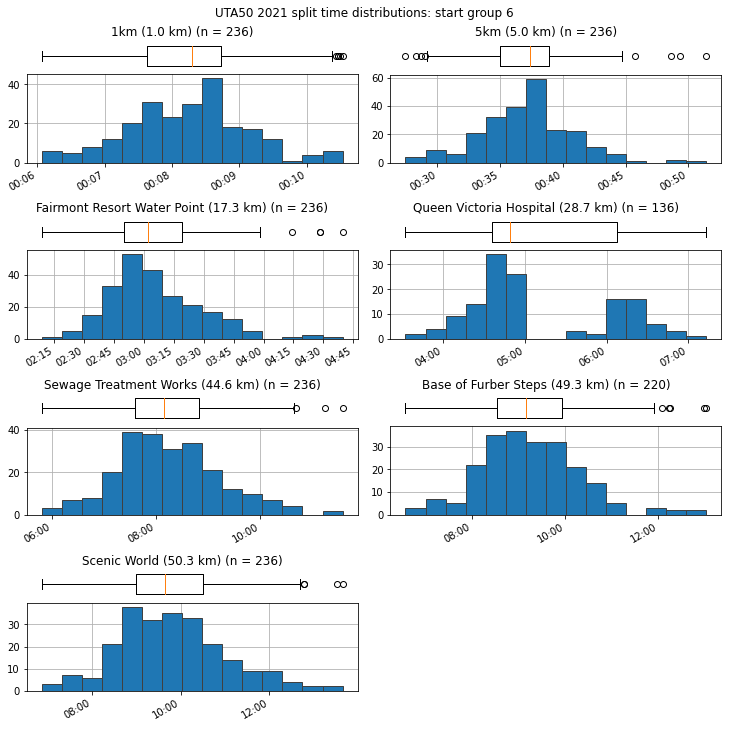

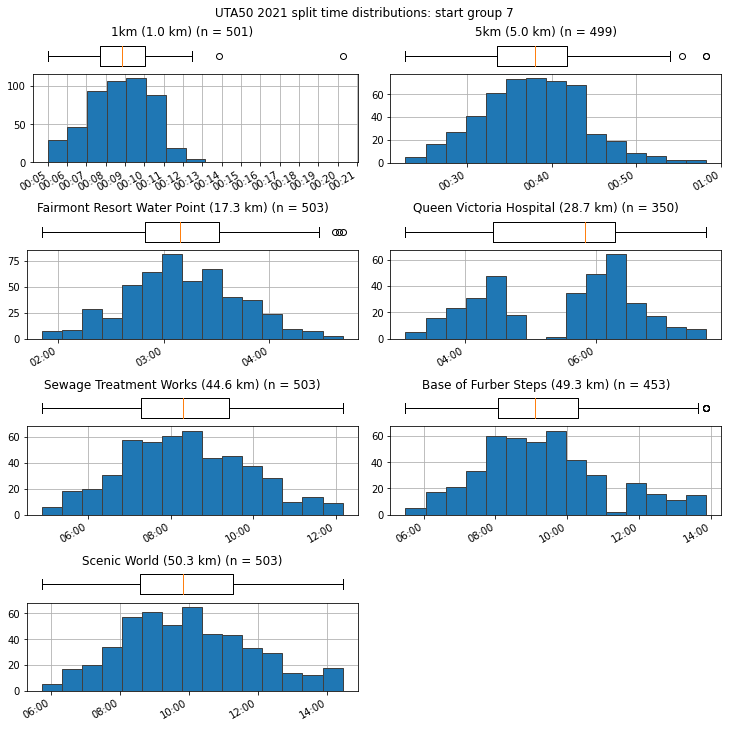

In [18]:
for n in range(1, 8):
    data = df[df['Start Group'] == f'Start Group {n}']

    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    subfigs = fig.subfigures(4, 2)
    for i in range(timing_points.size):
        plot_distribution(subfigs.flat[i], data, timing_points[i],
        seconds=False, n_bins=15, n_ticks=2)

    fig.suptitle(f'UTA50 2021 split time distributions: start group {n}')
    fig.savefig(
        f'../figures/UTA50_2021/by_startgroup/UTA50_2021_startgroup{n}.png',
        facecolor='w', bbox_inches='tight')

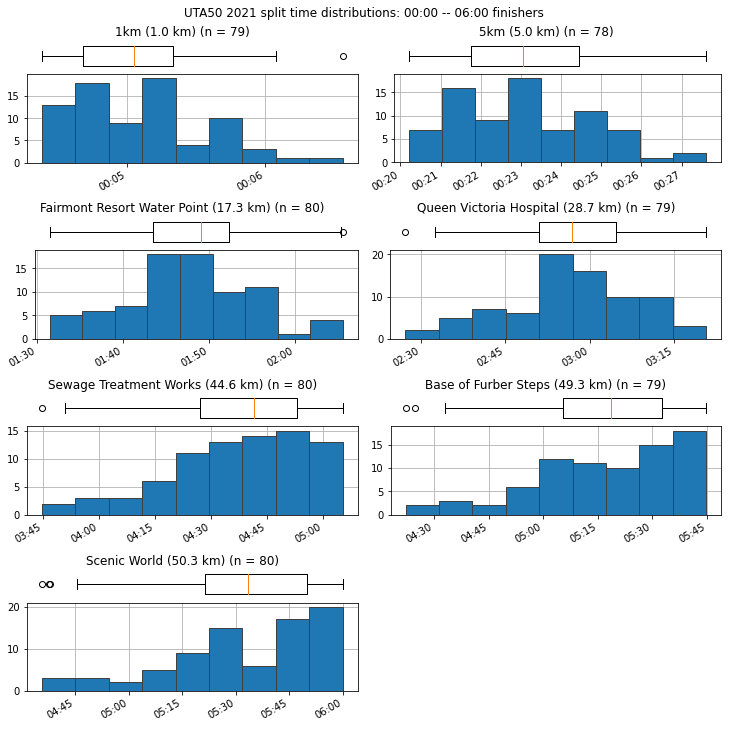

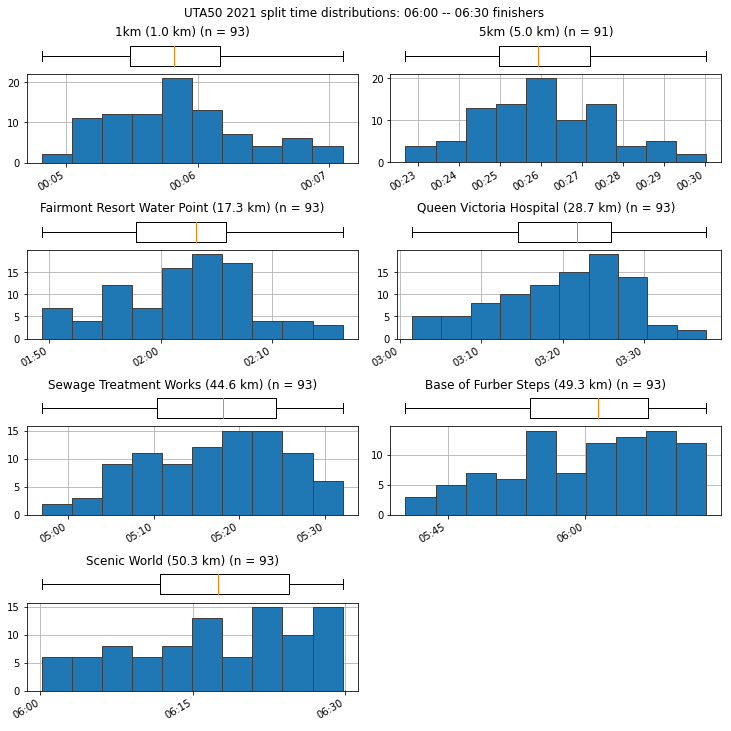

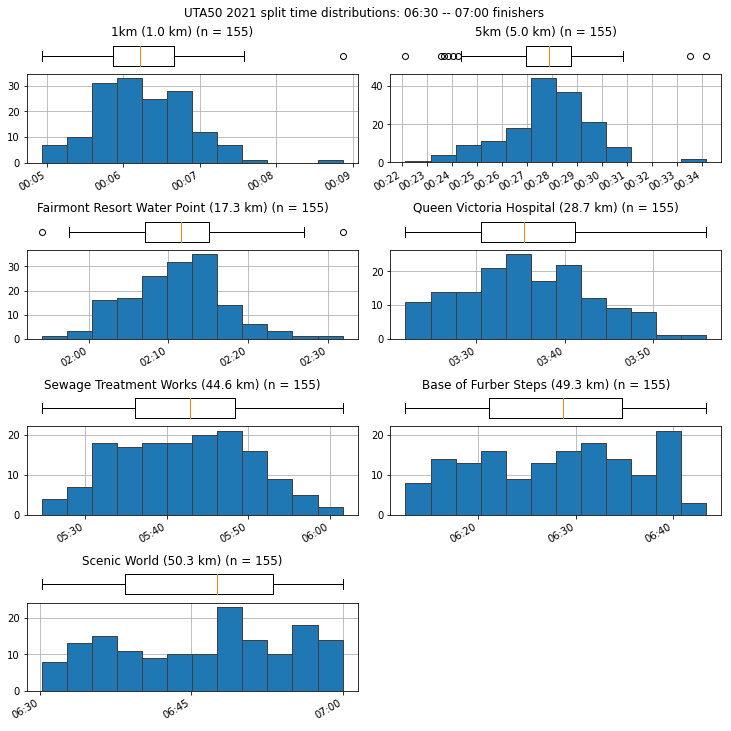

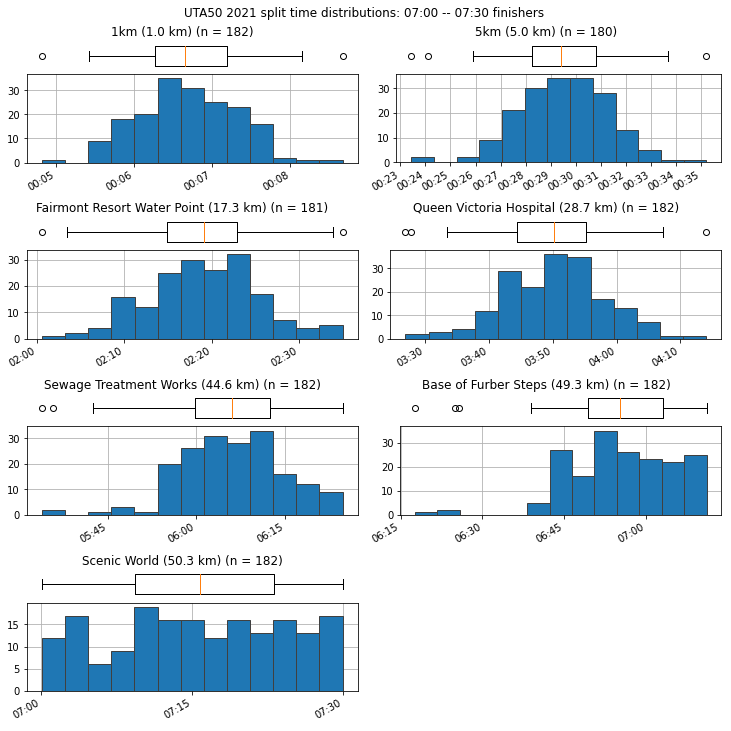

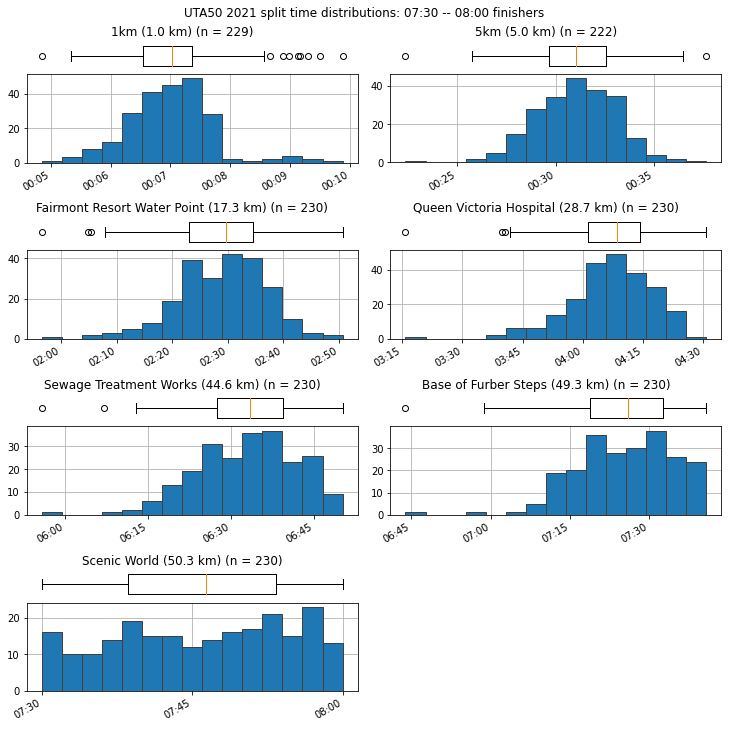

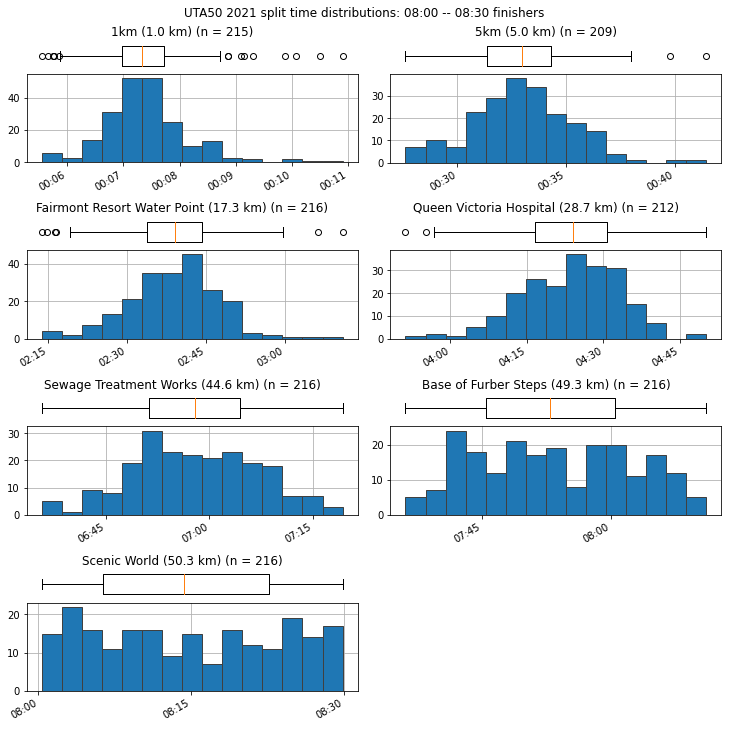

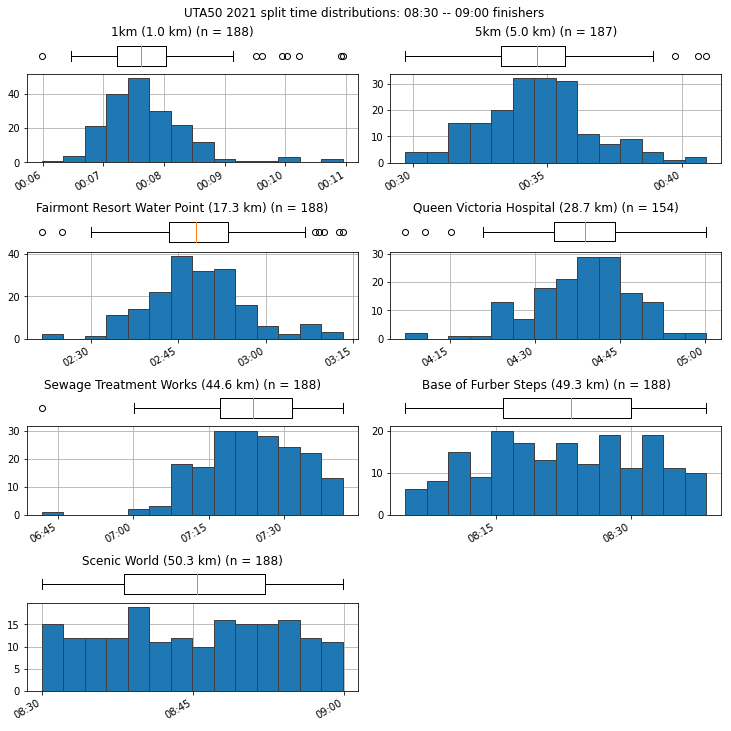

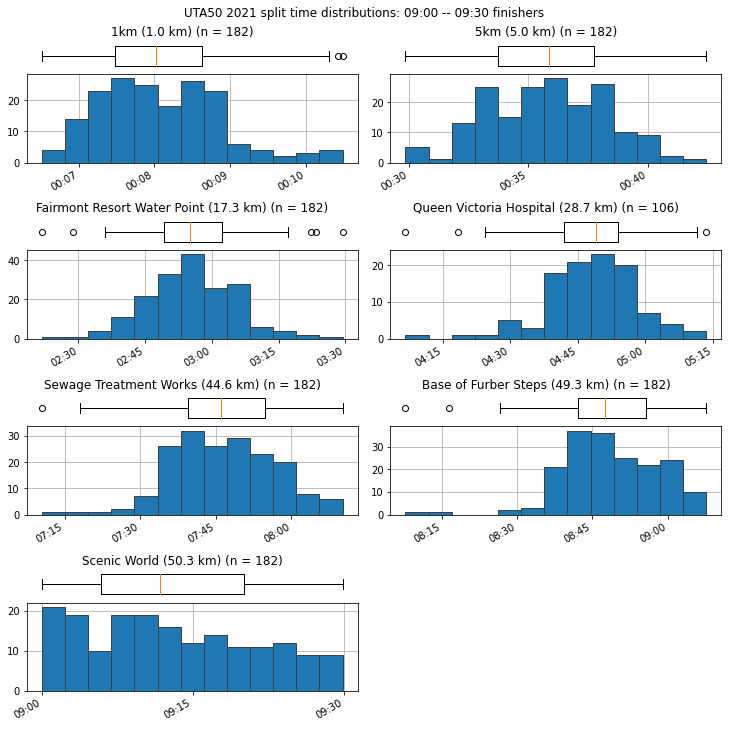

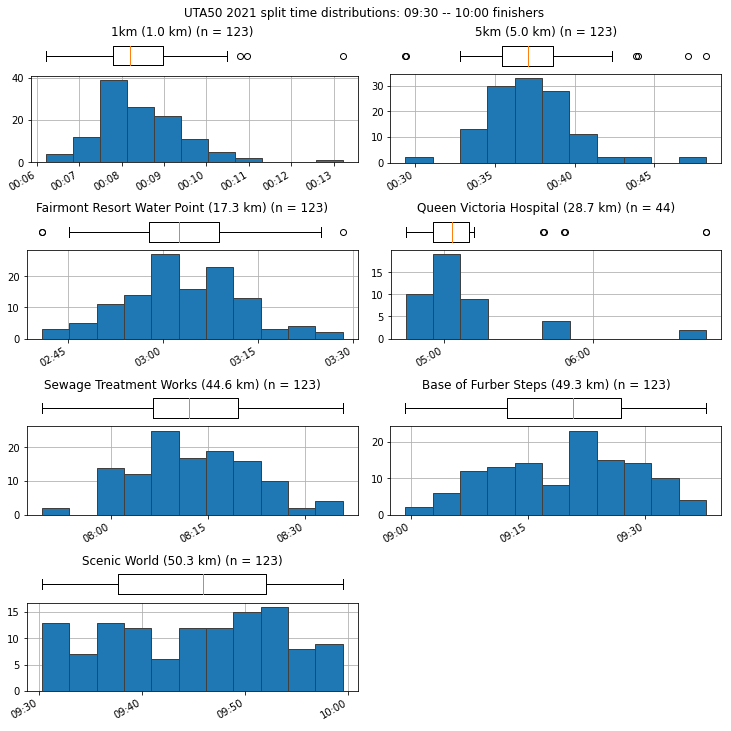

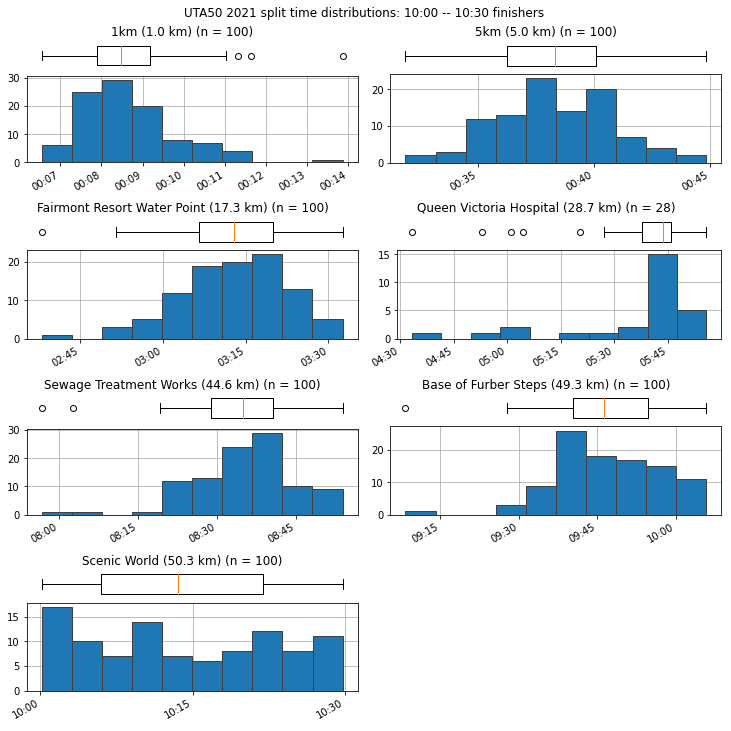

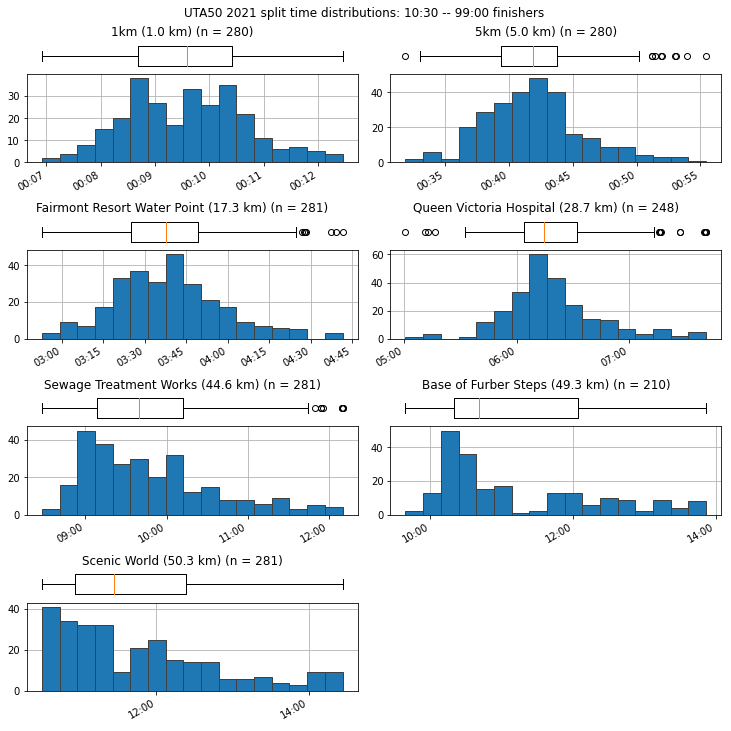

In [89]:
cutoffs = [pd.Timedelta(hours=h) for h in np.arange(6, 10.6, 0.5)]
cutoffs = [pd.Timedelta(0), *cutoffs, pd.Timedelta(hours=99)]
for i in range(len(cutoffs) - 1):
    min_time = cutoffs[i]
    max_time = cutoffs[i+1]
    mask = (
        (min_time <= df['Scenic World split time'])
        & (df['Scenic World split time'] < max_time)
    )
    data = df[mask]

    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    subfigs = fig.subfigures(4, 2)
    n_bins = round(np.sqrt(data.shape[0]))
    for i in range(timing_points.size):
        plot_distribution(subfigs.flat[i], data, timing_points[i],
        seconds=False, n_bins=n_bins, n_ticks=2)

    title = (
        'UTA50 2021 split time distributions: {:s} -- {:s} finishers'
    ).format(
        float2str(min_time.total_seconds())[:-3],
        float2str(max_time.total_seconds())[:-3],
    )
    fig.suptitle(title)
    
    min_str = float2str(min_time.total_seconds())[:-3].replace(':', '')
    max_str = float2str(max_time.total_seconds())[:-3].replace(':', '')
    fig.savefig(
        f'../figures/UTA50_2021/by_finishtime/'
        f'UTA50_2021_{min_str}-{max_str}_finishers.png',
        facecolor='w', bbox_inches='tight')

## UTA100

In [90]:
timing_point_df = pd.read_csv('../data/UTA100_2021_timing_points.csv')
def distance(name):
    idx = timing_point_df['Name'] == name
    return timing_point_df['Distance (km)'][idx].item()

In [93]:
df = pd.read_csv('../data/UTA100_2021_split_times.csv')
for col in df.columns:
    if 'split time' in col:
        df[col] = df[col].apply(pd.Timedelta)

df.head()

,Surname,First Name,Category,Gender,Age,Club,Australia,Start Group,KCC OVAL split time,KCC OVAL place,...,Sewage Treatment Works arrival time,Sewage Treatment Works departure time,Base of Furber Steps split time,Base of Furber Steps place,Base of Furber Steps arrival time,Base of Furber Steps departure time,Scenic World split time,Scenic World place,Scenic World arrival time,Scenic World departure time
0,Pellow,Matthew,Vet M,Male,30-39,NaN,Australia,Start Group 1,0 days,-,...,15:24:32,NaN,0 days 09:36:57,1.0,15:56:57,NaN,0 days 09:51:32,1,16:11:32,NaN
1,Armstrong,Vajin,MasterM,Male,40-49,Sri Chinmoy Marathon Team,New Zealand,Start Group 1,0 days,-,...,15:32:12,NaN,0 days 09:50:57,2.0,16:10:57,NaN,0 days 10:04:28,2,16:24:28,NaN
2,Dimuantes,Michael,OpenM,Male,18-29,UWA Running Club,Australia,Start Group 1,0 days,-,...,15:37:59,NaN,0 days 09:56:58,3.0,16:16:58,NaN,0 days 10:09:37,3,16:29:37,NaN
3,Crehan,Matthew,Vet M,Male,30-39,La Sportiva,Australia,Start Group 1,0 days,-,...,15:47:00,NaN,0 days 10:02:52,4.0,16:22:52,NaN,0 days 10:16:08,4,16:36:08,NaN
4,Davies,Brendan,MasterM,Male,40-49,UP Coaching,Australia,Start Group 1,0 days,-,...,15:50:38,NaN,0 days 10:09:16,5.0,16:29:16,NaN,0 days 10:24:07,5,16:44:07,NaN


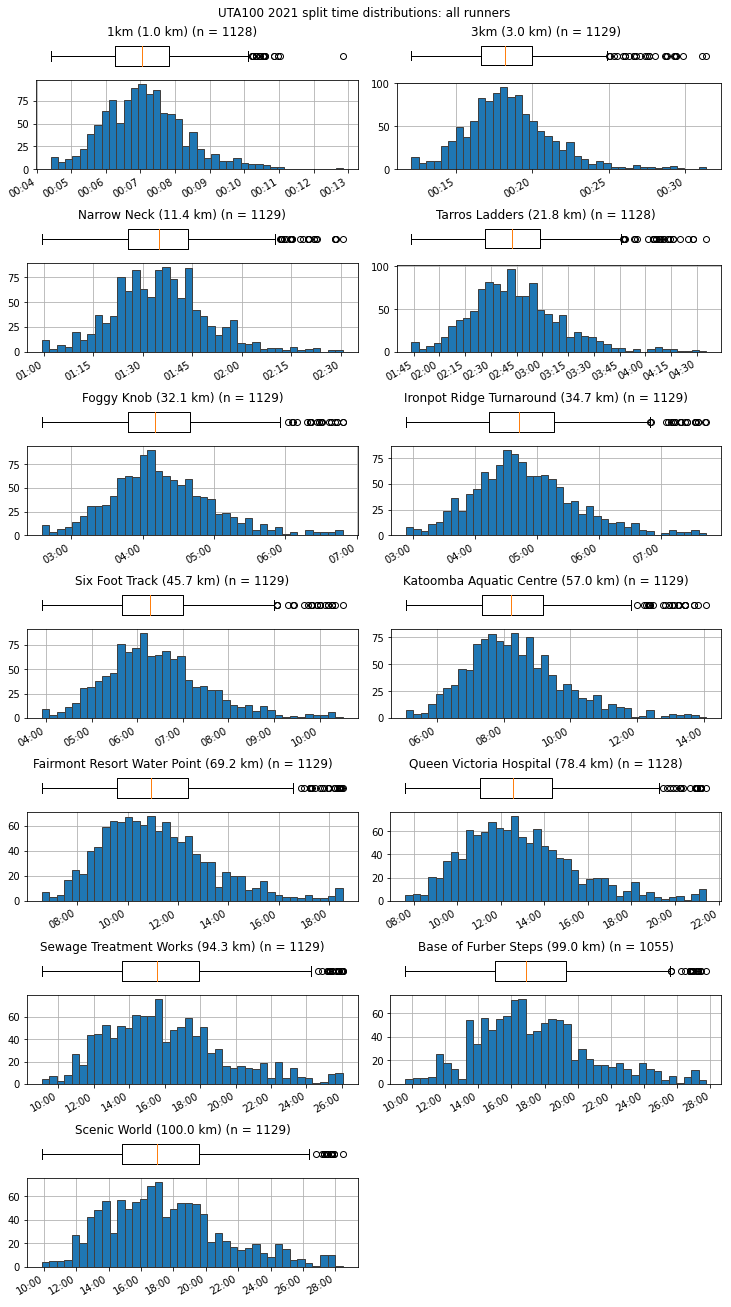

In [106]:
timing_points = df.columns[df.columns.str.contains('split time')][1:]

fig = plt.figure(figsize=(10,18), constrained_layout=True)
subfigs = fig.subfigures(7, 2)
for i in range(timing_points.size):
    plot_distribution(
        subfigs.flat[i], df, timing_points[i], seconds=False, n_ticks=2.5)

fig.suptitle('UTA100 2021 split time distributions: all runners')
fig.savefig(
    '../figures/UTA100_2021/UTA100_2021_overall.png',
    facecolor='w', bbox_inches='tight')

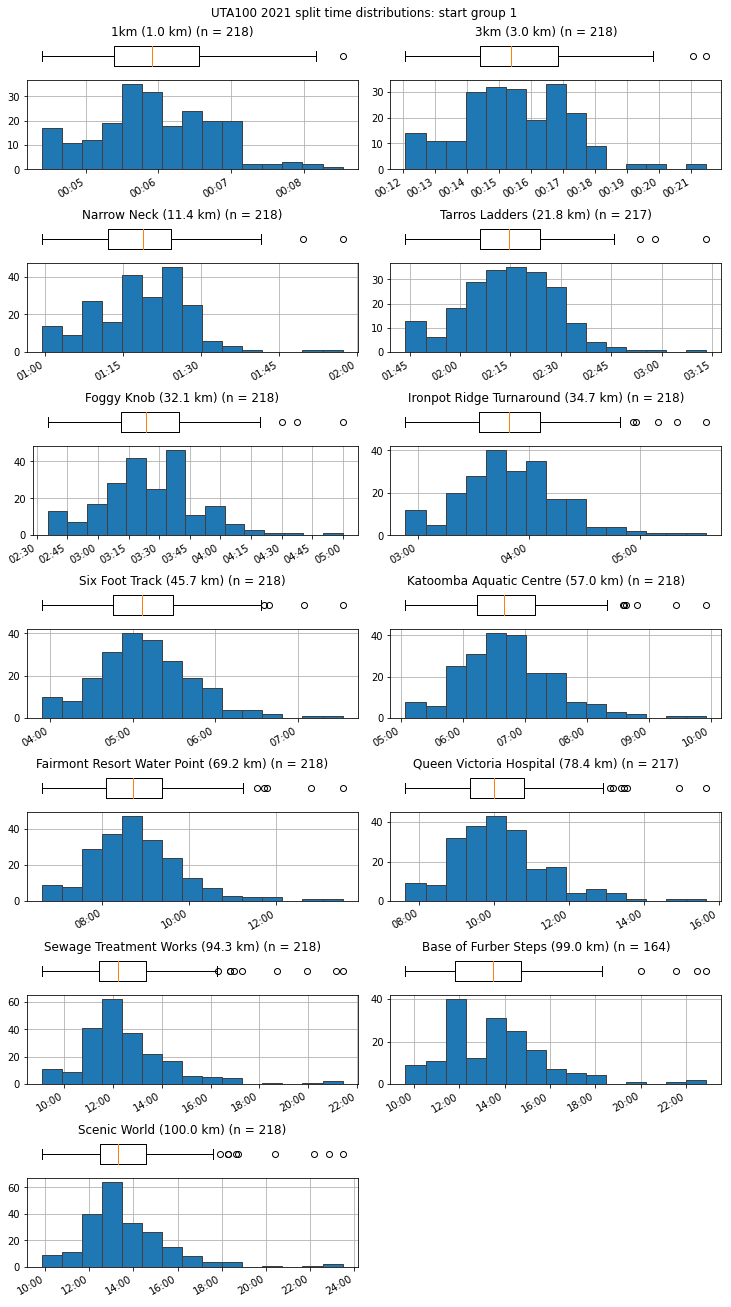

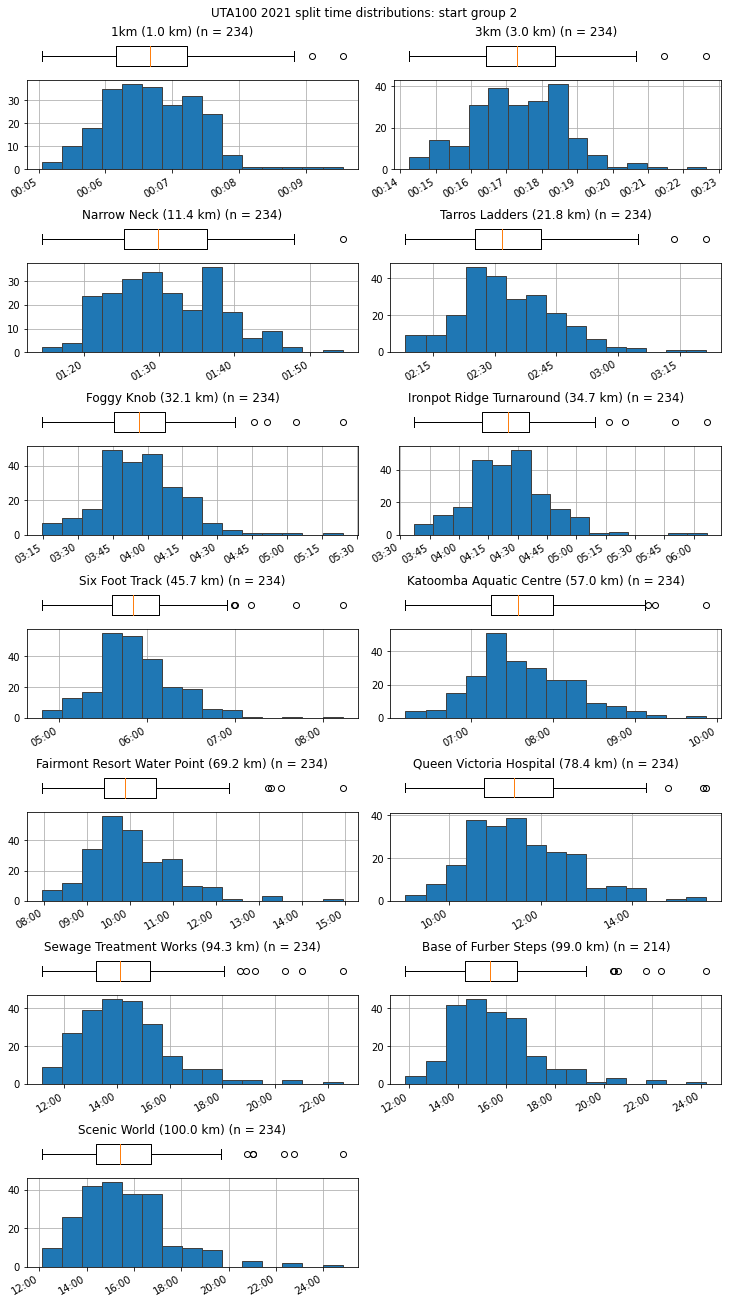

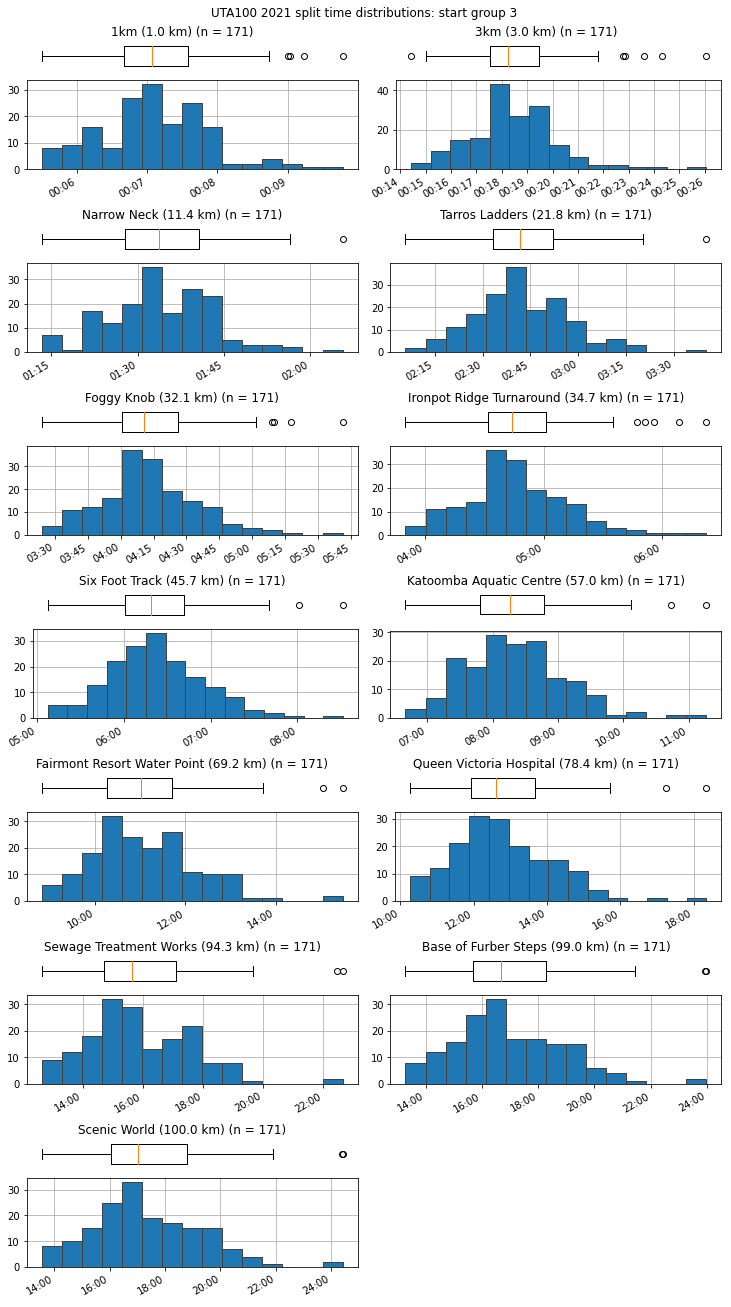

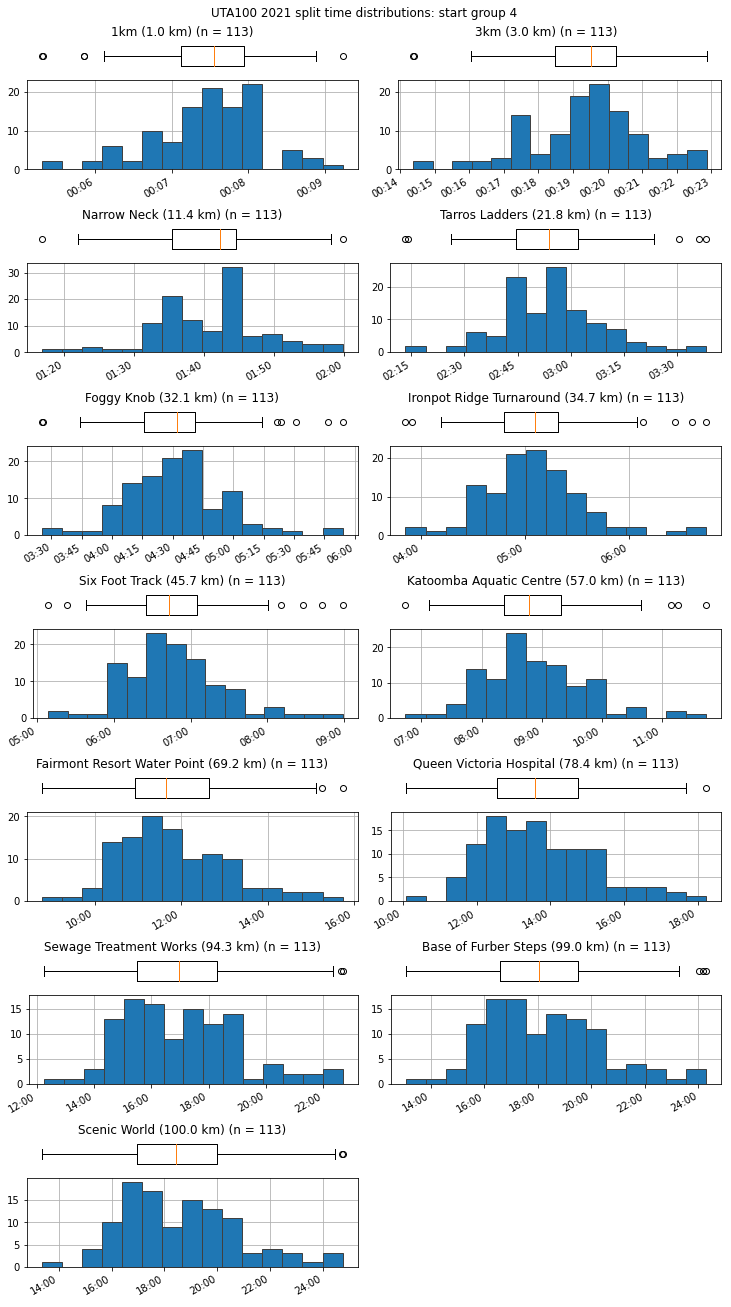

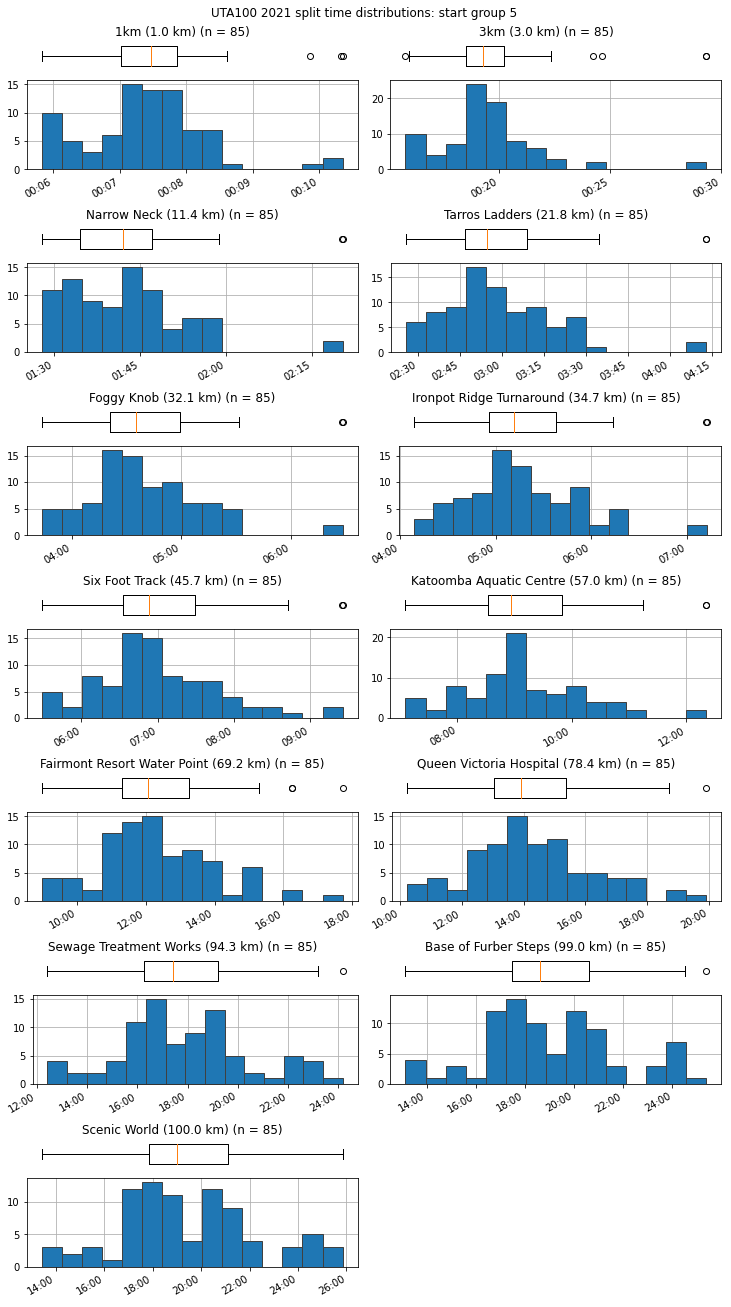

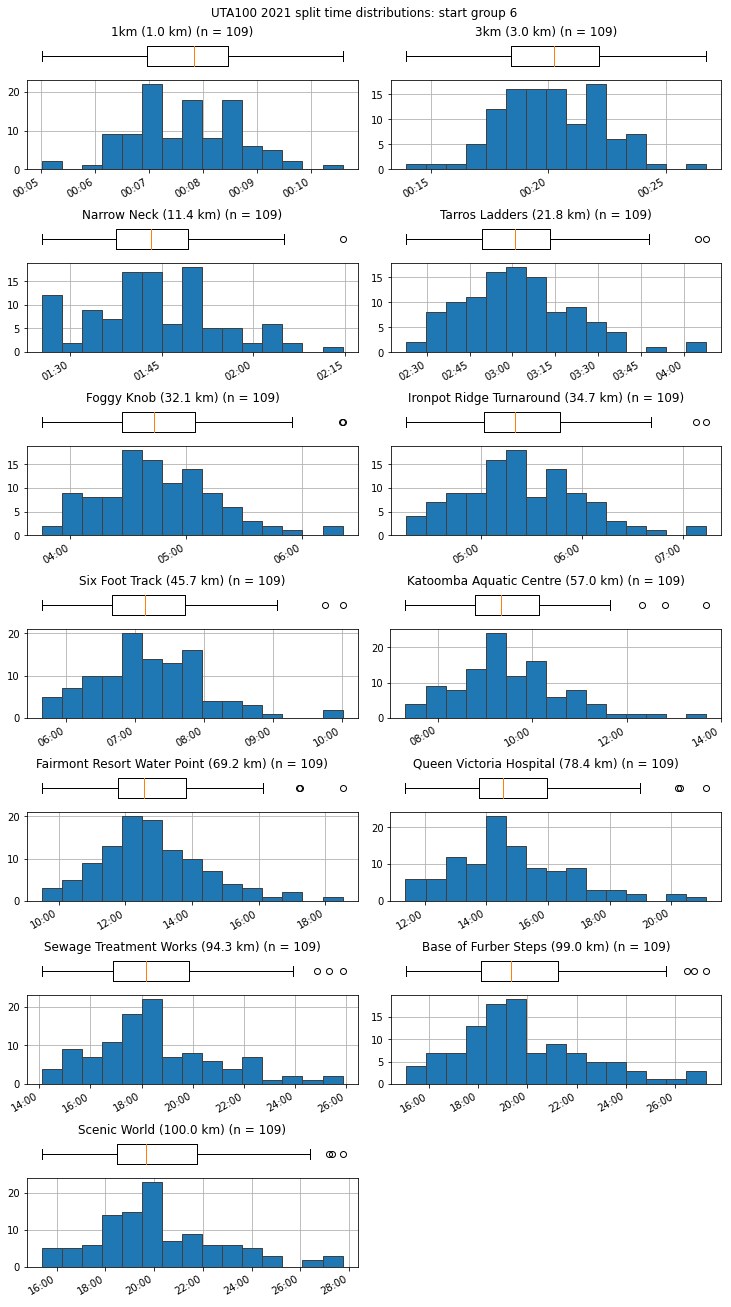

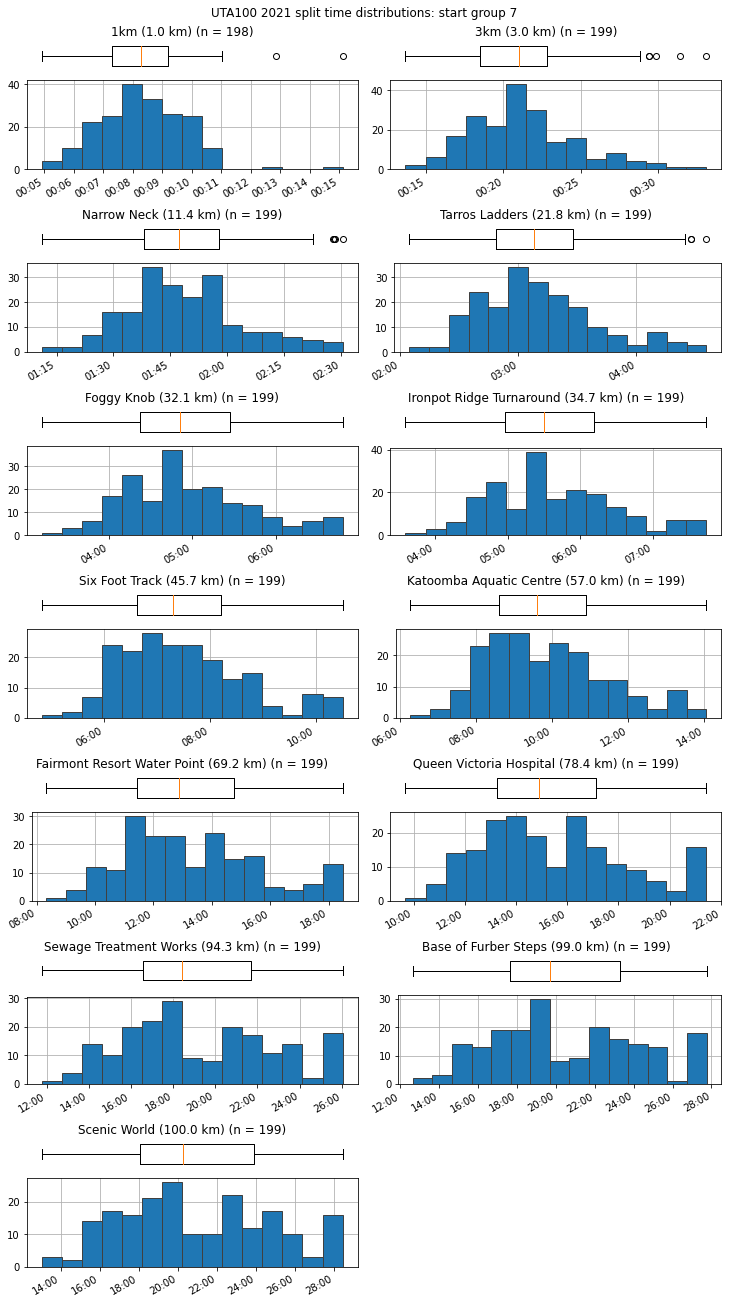

In [107]:
for n in range(1, 8):
    data = df[df['Start Group'] == f'Start Group {n}']

    fig = plt.figure(figsize=(10,18), constrained_layout=True)
    subfigs = fig.subfigures(7, 2)
    for i in range(timing_points.size):
        plot_distribution(subfigs.flat[i], data, timing_points[i],
        seconds=False, n_bins=15, n_ticks=2)

    fig.suptitle(f'UTA100 2021 split time distributions: start group {n}')
    fig.savefig(
        f'../figures/UTA100_2021/by_startgroup/UTA100_2021_startgroup{n}.png',
        facecolor='w', bbox_inches='tight')

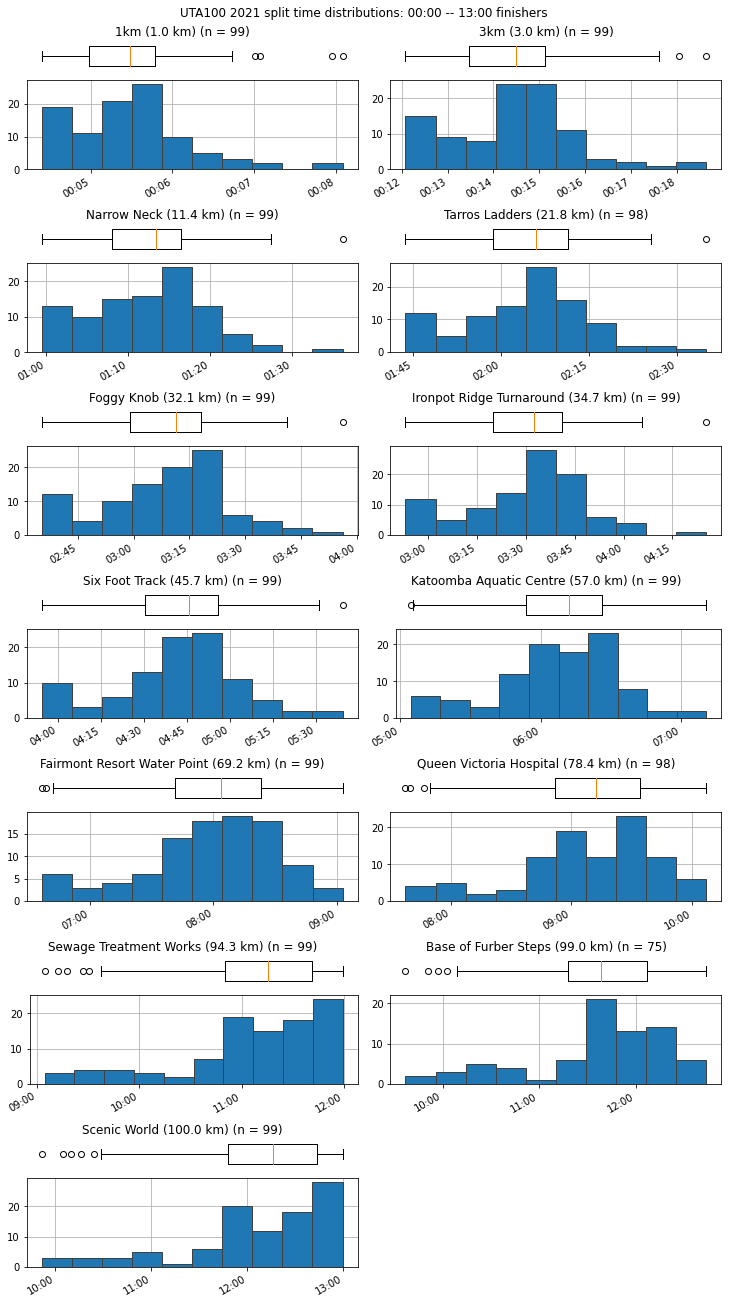

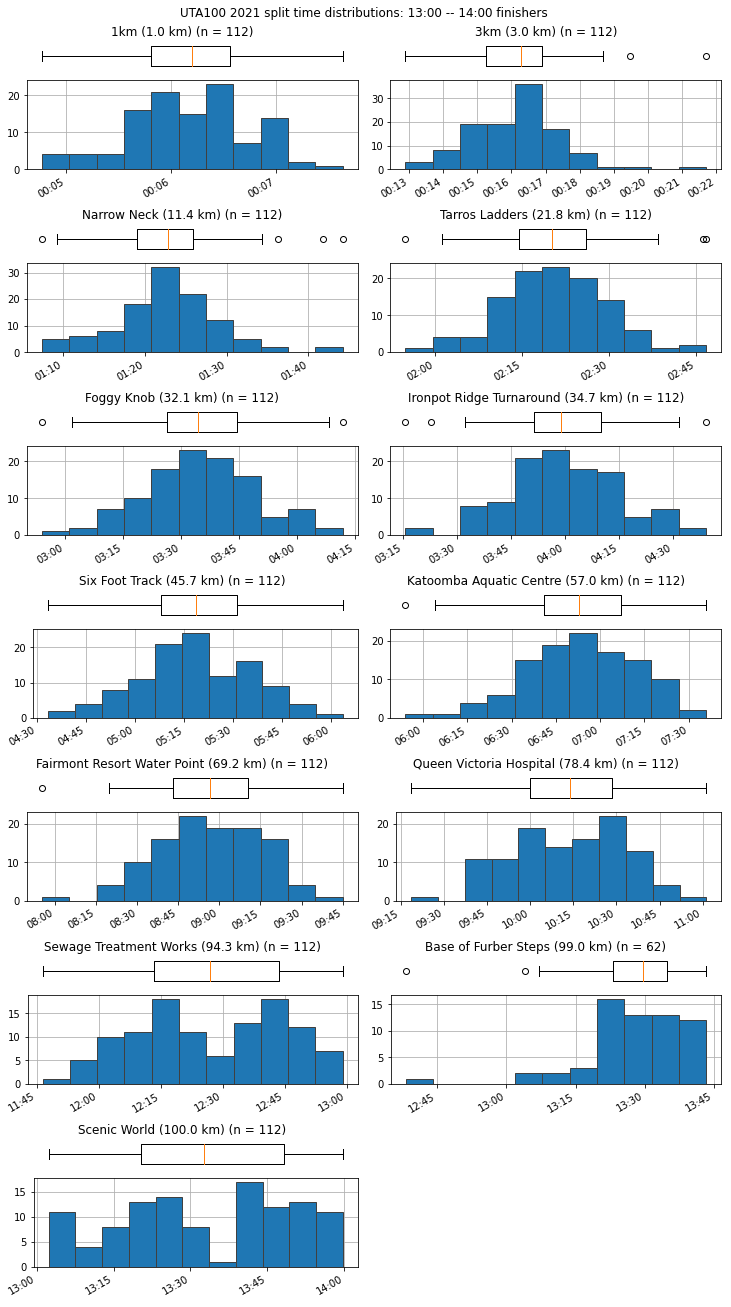

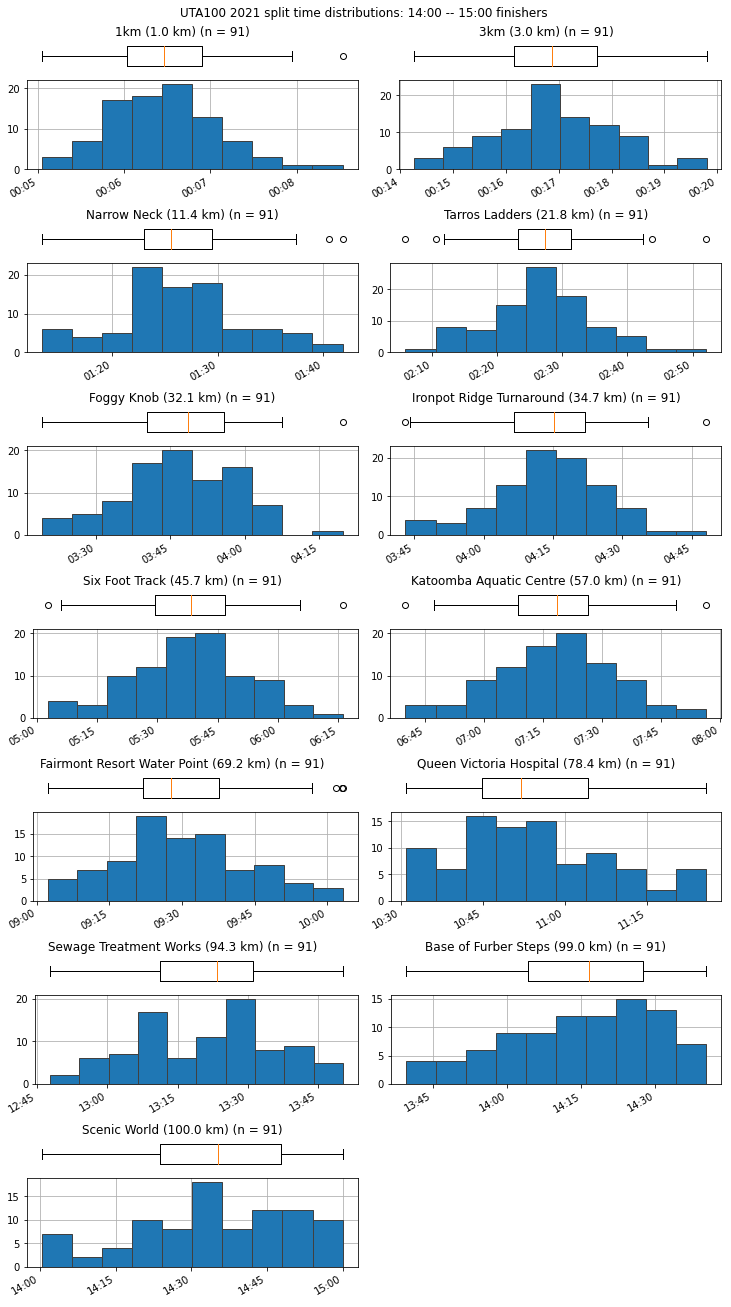

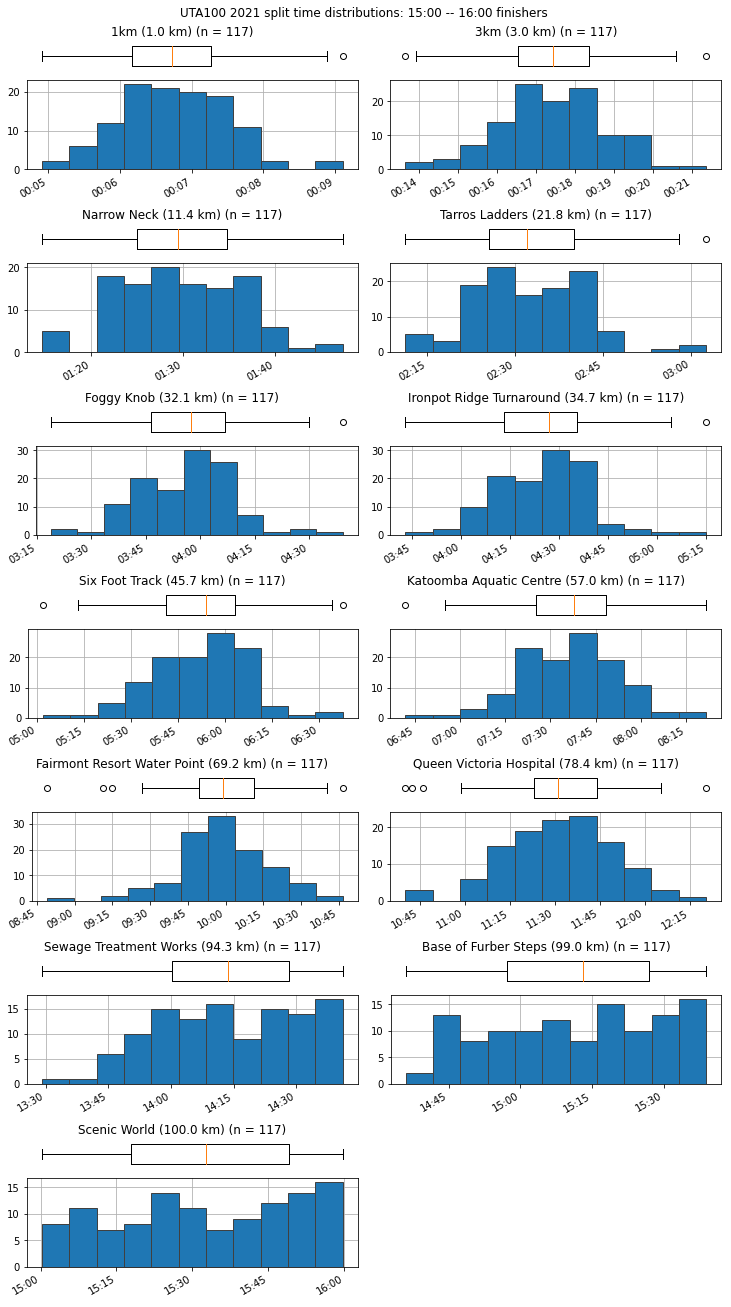

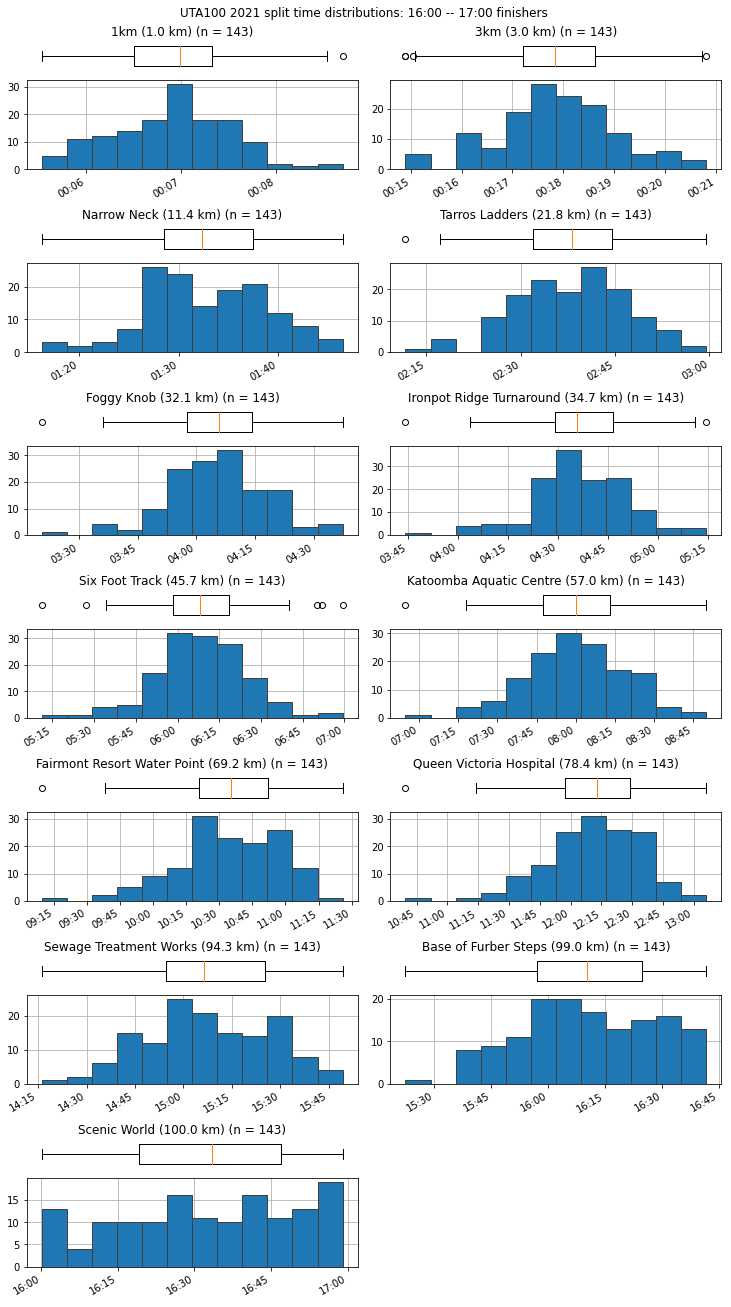

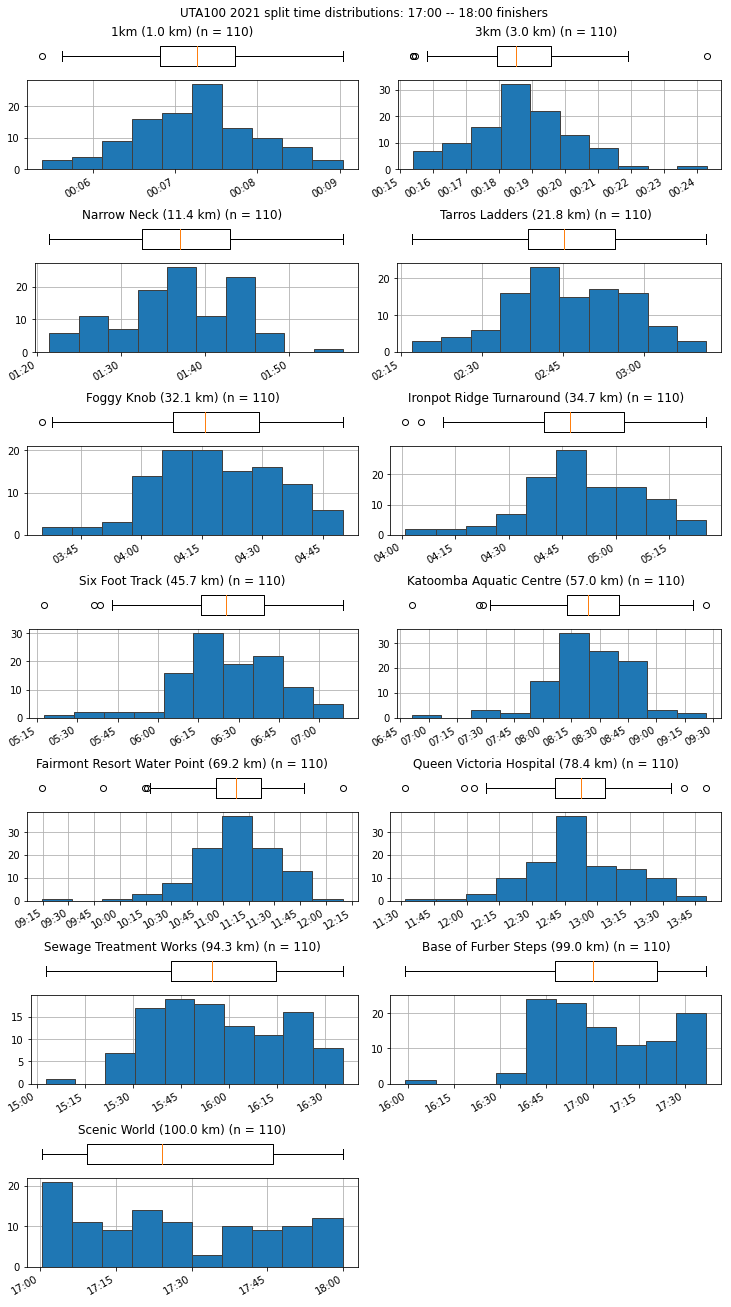

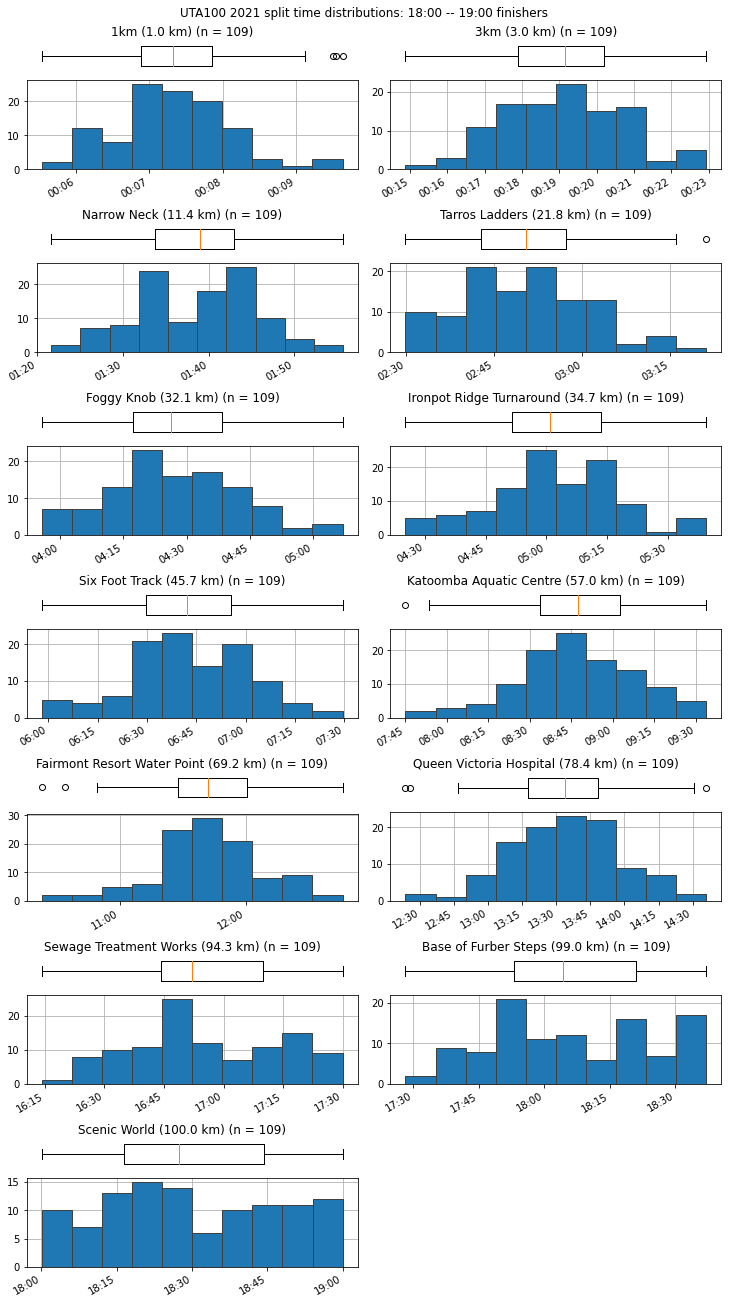

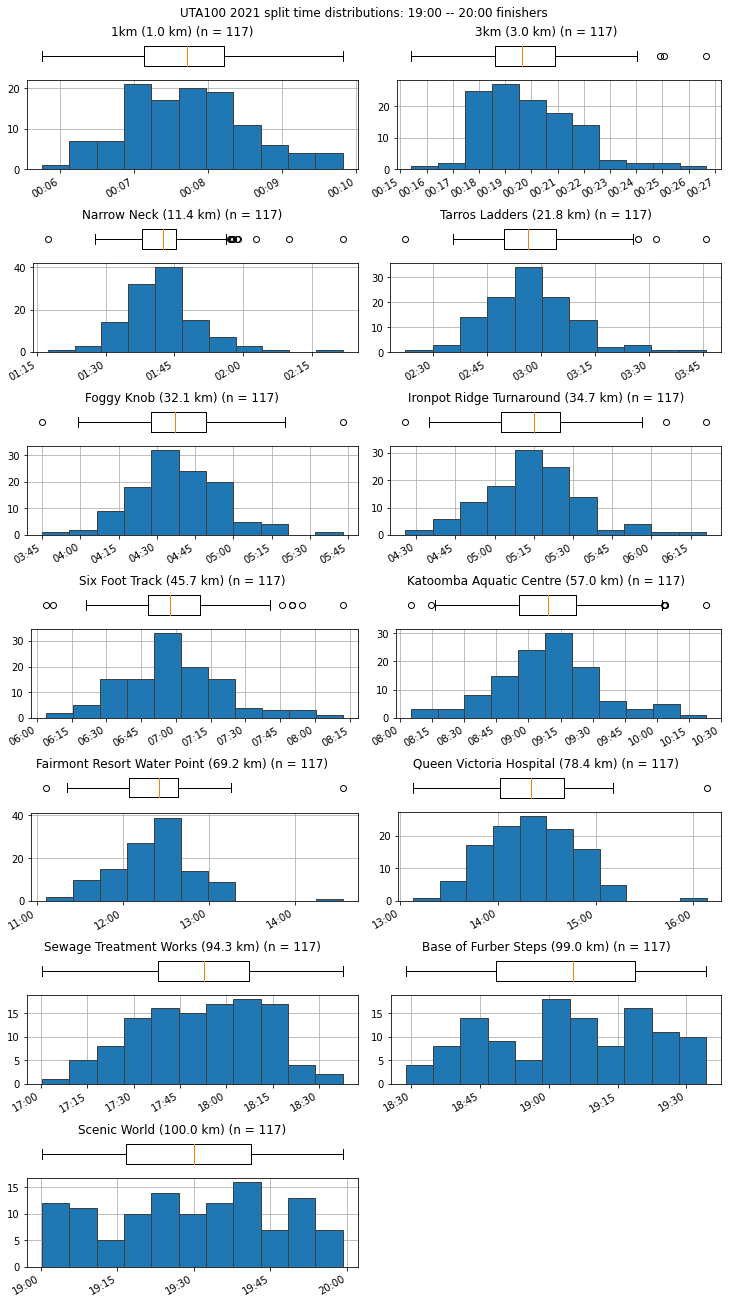

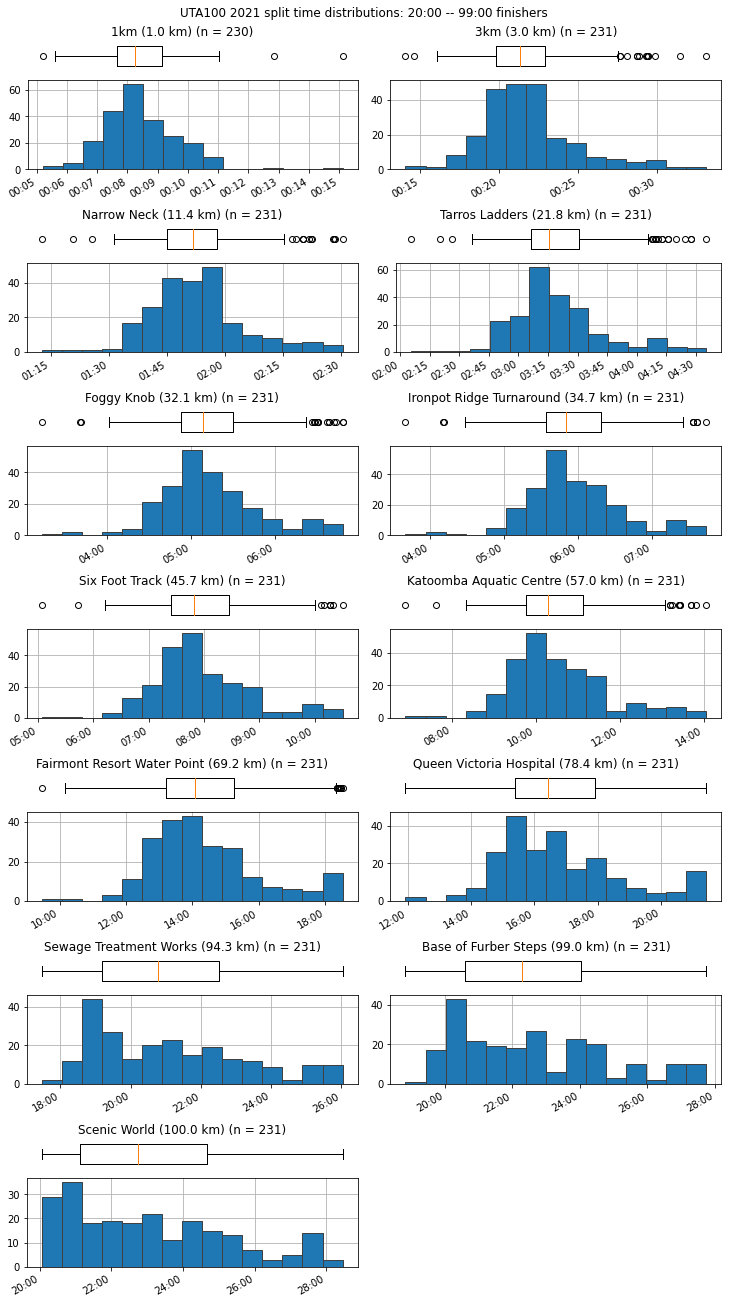

In [119]:
cutoffs = [pd.Timedelta(hours=h) for h in np.arange(13, 20.1, 1)]
cutoffs = [pd.Timedelta(0), *cutoffs, pd.Timedelta(hours=99)]
for i in range(len(cutoffs) - 1):
    min_time = cutoffs[i]
    max_time = cutoffs[i+1]
    mask = (
        (min_time <= df['Scenic World split time'])
        & (df['Scenic World split time'] < max_time)
    )
    data = df[mask]

    fig = plt.figure(figsize=(10,18), constrained_layout=True)
    subfigs = fig.subfigures(7, 2)
    n_bins = round(np.sqrt(data.shape[0]))
    for i in range(timing_points.size):
        plot_distribution(subfigs.flat[i], data, timing_points[i],
        seconds=False, n_bins=n_bins, n_ticks=2)

    title = (
        'UTA100 2021 split time distributions: {:s} -- {:s} finishers'
    ).format(
        float2str(min_time.total_seconds())[:-3],
        float2str(max_time.total_seconds())[:-3],
    )
    fig.suptitle(title)
    
    min_str = float2str(min_time.total_seconds())[:-3].replace(':', '')
    max_str = float2str(max_time.total_seconds())[:-3].replace(':', '')
    fig.savefig(
        f'../figures/UTA100_2021/by_finishtime/'
        f'UTA100_2021_{min_str}-{max_str}_finishers.png',
        facecolor='w', bbox_inches='tight')